In [1]:
include("juliaMC.jl");

In [2]:
en_grid = [i for i=1e6:2e5:3e8];
function xs(x,A) 
        y=(2e8*cos.(3.0*x).*pdf.(Normal(A,1e7),x)-5e-8x +3)+10;

end

function xs1(x)
    y=10000
end

scat1 = Cross_section(mt=1,reaction="elastic_scatter",energy_grid=en_grid, xs= xs.(en_grid,1e8));
absp1 = Cross_section(mt=2,reaction="absorption",energy_grid=en_grid, xs= xs.(en_grid,5e7));

scat2 = Cross_section(mt=1,reaction="elastic_scatter",energy_grid=en_grid, xs= xs.(en_grid,1.5e8));
absp2 = Cross_section(mt=2,reaction="absorption",energy_grid=en_grid, xs= xs.(en_grid,8e7));

#=
scat1 = Cross_section(mt=1,reaction="elastic_scatter",energy_grid=en_grid, xs= xs1.(en_grid));
absp1 = Cross_section(mt=2,reaction="absorption",energy_grid=en_grid, xs= xs1.(en_grid)*0.01);

scat2 = Cross_section(mt=1,reaction="elastic_scatter",energy_grid=en_grid, xs= xs1.(en_grid));
absp2 = Cross_section(mt=2,reaction="absorption",energy_grid=en_grid, xs= xs1.(en_grid)*0.01);
=#

nuclide1 = Nuclide(Name="Fe56",XS=[scat1,absp1]);
nuclide2 = Nuclide(Name="Fe54",XS=[scat2,absp2]);


material1 = Material(name="IronMixture", nucs=[nuclide1,nuclide2], atomic_density = [0.6,0.6], density = 4.0,id=1);

tally_grid = [i for i=1e6:2e6:3e8];

In [3]:
tally1 = Flux_tally(energy_bins = tally_grid, radius=100)
@time simulation1 = juliaMC(material=material1,n=10000,n_batch =10, Tally_batch=tally1)

  0.959896 seconds (1

juliaMC
  n: Int64 10000
  n_batch: Int64 10
  source: Source
  material: Material
  N_bank: Array{Particle}((10000, 10))
  Tally_batch: Flux_tally


.54 M allocations: 138.130 MiB, 18.23% gc time)


In [4]:
@time a=run(simulation1)

Finished Batch 1
Finished Batch 2
Finished Batch 3
Finished Batch 4
Finished Batch 5
Finished Batch 6
Finished Batch 7
Finished Batch 8
Finished Batch 9
Finished Batch 10


Flux_tally
  n: Int64 1
  radius: Float64 3.0
  centre: Array{Float64}((3,)) [0.0, 0.0, 0.0]
  energy_bins: Array{Float64}((150,)) [1.0e6, 3.0e6, 5.0e6, 7.0e6, 9.0e6, 1.1e7, 1.3e7, 1.5e7, 1.7e7, 1.9e7  …  2.81e8, 2.83e8, 2.85e8, 2.87e8, 2.89e8, 2.91e8, 2.93e8, 2.95e8, 2.97e8, 2.99e8]
  Tally: Array{Float64}((149, 1)) [9.51209e-7; 8.31051e-7; … ; 0.0; 0.0]
  volume: Float64 113.09733552923254
  std: Array{Float64}((149,)) [6.08256e-8, 5.67221e-8, 8.54514e-8, 4.99918e-8, 2.83735e-8, 6.423e-8, 4.48042e-8, 5.33327e-8, 4.75534e-8, 4.33606e-8  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


  4.257872 seconds (12.52 M allocations: 433.981 MiB, 13.70% gc time)


In [5]:
tally1 = Flux_tally(energy_bins = tally_grid, radius=100)
@time simulation1 = juliaMC(material=material1,n=10000,n_batch =10, Tally_batch=tally1)

juliaMC
  n: Int64 10000
  n_batch: Int64 10
  source: Source
  material: Material
  N_bank: Array{Particle}((10000, 10))
  Tally_batch: Flux_tally


  0.537440 seconds (1.40 M allocations: 130.465 MiB, 67.37% gc time)


In [6]:
b=@time runTotalMonteCarlo(simulation1,10)

Finished Batch 1
Finished Batch 2
Finished Batch 3
Finished Batch 4
Finished Batch 5
Finished Batch 6
Finished Batch 7
Finished Batch 8
Finished Batch 9
Finished Batch 10
<------Finished Iteration 1------>
Finished Batch 1
Finished Batch 2
Finished Batch 3
Finished Batch 4
Finished Batch 5
Finished Batch 6
Finished Batch 7
Finished Batch 8
Finished Batch 9
Finished Batch 10
<------Finished Iteration 2------>
Finished Batch 1
Finished Batch 2
Finished Batch 3
Finished Batch 4
Finished Batch 5
Finished Batch 6
Finished Batch 7
Finished Batch 8
Finished Batch 9
Finished Batch 10
<------Finished Iteration 3------>
Finished Batch 1
Finished Batch 2
Finished Batch 3
Finished Batch 4
Finished Batch 5
Finished Batch 6
Finished Batch 7
Finished Batch 8
Finished Batch 9
Finished Batch 10
<------Finished Iteration 4------>
Finished Batch 1
Finished Batch 2
Finished Batch 3
Finished Batch 4
Finished Batch 5
Finished Batch 6
Finished Batch 7
Finished Batch 8
Finished Batch 9
Finished Batch 10
<----

Flux_tally
  n: Int64 1
  radius: Float64 3.0
  centre: Array{Float64}((3,)) [0.0, 0.0, 0.0]
  energy_bins: Array{Float64}((150,)) [1.0e6, 3.0e6, 5.0e6, 7.0e6, 9.0e6, 1.1e7, 1.3e7, 1.5e7, 1.7e7, 1.9e7  …  2.81e8, 2.83e8, 2.85e8, 2.87e8, 2.89e8, 2.91e8, 2.93e8, 2.95e8, 2.97e8, 2.99e8]
  Tally: Array{Float64}((149, 1)) [1.09712e-7; 9.17604e-8; … ; 0.0; 0.0]
  volume: Float64 113.09733552923254
  std: Array{Float64}((149,)) [5.89557e-8, 4.66748e-8, 3.77547e-8, 3.27508e-8, 2.87585e-8, 2.54096e-8, 2.24539e-8, 2.14705e-8, 1.85271e-8, 1.88121e-8  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


 52.109990 seconds (136.02 M allocations: 4.830 GiB, 16.69% gc time)


In [9]:
tally1 = Flux_tally(energy_bins = tally_grid, radius=100)
@time simulation1 = juliaMC(material=material1,n=10000,n_batch =100, Tally_batch=tally1)
c=@time runFlySampling(simulation1)

  3.818067 seconds (14.00 M allocations: 1.274 GiB, 59.62% gc time)
Finished Batch 1
Finished Batch 2
Finished Batch 3
Finished Batch 4
Finished Batch 5
Finished Batch 6
Finished Batch 7
Finished Batch 8
Finished Batch 9
Finished Batch 10
Finished Batch 11
Finished Batch 12
Finished Batch 13
Finished Batch 14
Finished Batch 15
Finished Batch 16
Finished Batch 17
Finished Batch 18
Finished Batch 19
Finished Batch 20
Finished Batch 21
Finished Batch 22
Finished Batch 23
Finished Batch 24
Finished Batch 25
Finished Batch 26
Finished Batch 27
Finished Batch 28
Finished Batch 29
Finished Batch 30
Finished Batch 31
Finished Batch 32
Finished Batch 33
Finished Batch 34
Finished Batch 35
Finished Batch 36
Finished Batch 37
Finished Batch 38
Finished Batch 39
Finished Batch 40
Finished Batch 41
Finished Batch 42
Finished Batch 43
Finished Batch 44
Finished Batch 45
Finished Batch 46
Finished Batch 47
Finished Batch 48
Finished Batch 49
Finished Batch 50
Finished Batch 51
Finished Batch 52
Finis

Flux_tally
  n: Int64 1
  radius: Float64 3.0
  centre: Array{Float64}((3,)) [0.0, 0.0, 0.0]
  energy_bins: Array{Float64}((150,)) [1.0e6, 3.0e6, 5.0e6, 7.0e6, 9.0e6, 1.1e7, 1.3e7, 1.5e7, 1.7e7, 1.9e7  …  2.81e8, 2.83e8, 2.85e8, 2.87e8, 2.89e8, 2.91e8, 2.93e8, 2.95e8, 2.97e8, 2.99e8]
  Tally: Array{Float64}((149, 1)) [9.92637e-8; 8.6312e-8; … ; 0.0; 0.0]
  volume: Float64 113.09733552923254
  std: Array{Float64}((149,)) [6.76407e-9, 6.93352e-9, 7.19997e-9, 6.29797e-9, 6.13965e-9, 5.6332e-9, 5.21079e-9, 5.3622e-9, 4.55798e-9, 4.95202e-9  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]



 36.501628 seconds (121.72 M allocations: 4.053 GiB, 25.04% gc time)


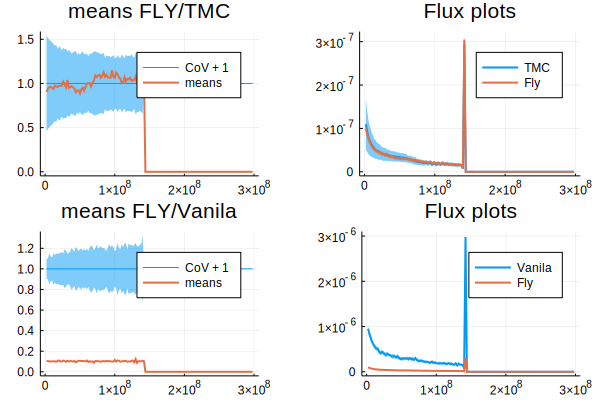

In [137]:
plotTally(b,c,a)

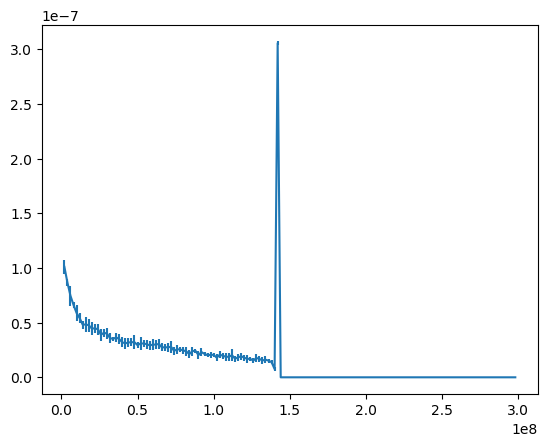

(PyObject <matplotlib.lines.Line2D object at 0x1446aa860>, (), (PyObject <matplotlib.collections.LineCollection object at 0x1446aadd8>,))

In [45]:
plotTally(c)

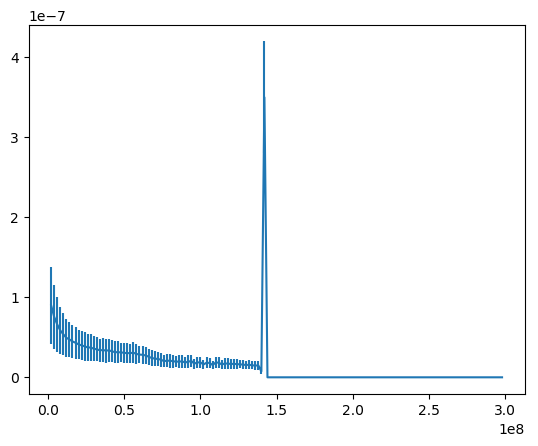

(PyObject <matplotlib.lines.Line2D object at 0x1448f7eb8>, (), (PyObject <matplotlib.collections.LineCollection object at 0x144901470>,))

In [46]:
plotTally(b)

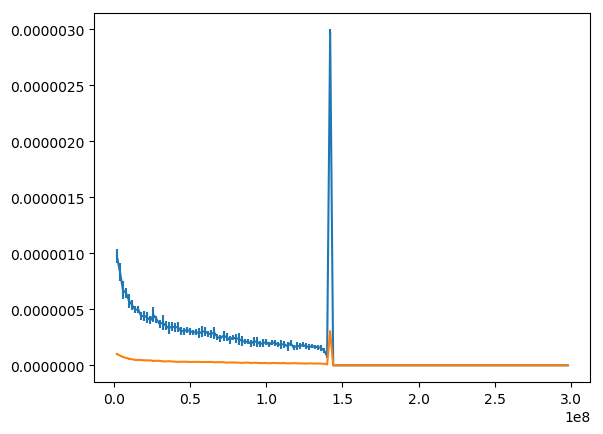

In [54]:
plotTally(a)
plotTally(c)
show()

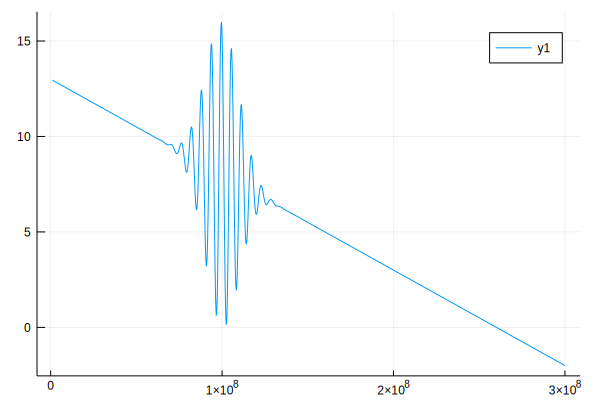

In [3]:
plot(en_grid, xs.(en_grid,1e8))